In [1]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Land Mines
land_mines = fetch_ucirepo(id=763)

# Ekstrak fitur dan target (sudah dalam bentuk pandas DataFrame)
X = land_mines.data.features
y = land_mines.data.targets

# Simpan fitur ke dalam file CSV
X.to_csv("land_mines.data.features.csv", index=False)

# Tampilkan informasi dan 5 baris pertama
print(X.info())
print(X.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB
None
          V         H    S
0  0.338157  0.000000  0.0
1  0.320241  0.181818  0.0
2  0.287009  0.272727  0.0
3  0.256284  0.454545  0.0
4  0.262840  0.545455  0.0


In [10]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from IPython.display import display  # Hanya untuk Jupyter/Colab

# Ambil dataset Land Mines
land_mines = fetch_ucirepo(id=763)

# Ambil fitur dan target
X = land_mines.data.features
y = land_mines.data.targets

# Gabungkan fitur dan target
data = pd.concat([X, y], axis=1)

# Tampilkan data (hanya display saja)
display(data)


,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


from matplotlib import pyplot as plt
data['V'].plot(kind='hist', bins=20, title='V')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['H'].plot(kind='hist', bins=20, title='H')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['S'].plot(kind='hist', bins=20, title='S')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['M'].plot(kind='hist', bins=20, title='M')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='V', y='H', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='H', y='S', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='S', y='M', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['V'].plot(kind='line', figsize=(8, 4), title='V')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['H'].plot(kind='line', figsize=(8, 4), title='H')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['S'].plot(kind='line', figsize=(8, 4), title='S')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['M'].plot(kind='line', figsize=(8, 4), title='M')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['V'].plot(kind='hist', bins=20, title='V')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['H'].plot(kind='hist', bins=20, title='H')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['S'].plot(kind='hist', bins=20, title='S')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='V', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='V', y='H', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='H', y='S', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='S', y='M', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['H']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('H')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['S']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('S')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['M']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('M')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['V'].plot(kind='line', figsize=(8, 4), title='V')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['H'].plot(kind='line', figsize=(8, 4), title='H')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['S'].plot(kind='line', figsize=(8, 4), title='S')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)


(338, 4)

In [12]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset


Index(['V', 'H', 'S', 'M'], dtype='object')

In [13]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom


,0
V,float64
H,float64
S,float64
M,int64


In [15]:
data.groupby('M').size() #untuk mengetahui jumlah masing-masing class


,0
M,
1,71
2,70
3,66
4,66
5,65


## Identifikasi Kualitas Dataset


In [21]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Land Mines
land_mines = fetch_ucirepo(id=763)
X = land_mines.data.features
y = land_mines.data.targets

# Gabungkan fitur dan target
data = pd.concat([X, y], axis=1)

# --- Deteksi Missing Values ---

# 1. Tampilkan jumlah missing values per kolom
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# 2. Tampilkan total missing values di seluruh dataset
print("\nTotal missing values di seluruh dataset:")
print(data.isnull().sum().sum())

# 3. Tampilkan baris yang mengandung missing value (jika ada)
print("\nBaris dengan missing value:")
print(data[data.isnull().any(axis=1)])



Jumlah missing values per kolom:
V    0
H    0
S    0
M    0
dtype: int64

Total missing values di seluruh dataset:
0

Baris dengan missing value:
Empty DataFrame
Columns: [V, H, S, M]
Index: []


# Preprocessing Data

## Tranformasi Data

In [25]:

# Mapping nilai kolom 'M' sesuai klasifikasi ranjau
mine_type_map = {
    1: 'Null',
    2: 'Anti-Tank',
    3: 'Anti-Personnel',
    4: 'Booby Trapped Anti-Personnel',
    5: 'M14 Anti-Personnel'
}

# Ubah nilai kolom M jika ada
if 'M' in data.columns:
    data['M'] = data['M'].replace(mine_type_map)
else:
    print("Kolom 'M' tidak ditemukan dalam dataset!")

# Tampilkan 10 baris pertama
print("\n=== 10 Baris Pertama ===")
print(data.head(10))

# Tampilkan 10 baris terakhir
print("\n=== 10 Baris Terakhir ===")
print(data.tail(10))



=== 10 Baris Pertama ===
          V         H    S     M
0  0.338157  0.000000  0.0  Null
1  0.320241  0.181818  0.0  Null
2  0.287009  0.272727  0.0  Null
3  0.256284  0.454545  0.0  Null
4  0.262840  0.545455  0.0  Null
5  0.240966  0.727273  0.0  Null
6  0.254410  0.818182  0.0  Null
7  0.234924  1.000000  0.0  Null
8  0.353474  0.000000  0.6  Null
9  0.335347  0.181818  0.6  Null

=== 10 Baris Terakhir ===
            V         H    S                   M
328  0.378157  0.545455  0.8  M14 Anti-Personnel
329  0.319939  0.818182  0.8  M14 Anti-Personnel
330  0.519637  0.090909  0.4  M14 Anti-Personnel
331  0.398791  0.363636  0.4  M14 Anti-Personnel
332  0.347432  0.636364  0.4  M14 Anti-Personnel
333  0.323262  0.909091  0.4  M14 Anti-Personnel
334  0.444108  0.181818  1.0  M14 Anti-Personnel
335  0.353474  0.454545  1.0  M14 Anti-Personnel
336  0.362537  0.727273  1.0  M14 Anti-Personnel
337  0.314199  1.000000  1.0  M14 Anti-Personnel


In [28]:

# Pastikan kolom 'M' sudah dalam bentuk deskriptif (string), lalu lakukan mapping ke angka
mine_type_to_num = {
    'Null': 1,
    'Anti-Tank': 2,
    'Anti-Personnel': 3,
    'Booby Trapped Anti-Personnel': 4,
    'M14 Anti-Personnel': 5
}

# Mapping deskripsi ke angka
if 'M' in data.columns:
    data['M'] = data['M'].replace(mine_type_to_num)
else:
    print("Kolom 'M' tidak ditemukan!")

# Tampilkan 10 baris pertama
print("10 Baris Pertama:")
print(data.head(10))

# Tampilkan 10 baris terakhir
print("\n10 Baris Terakhir:")
print(data.tail(10))


10 Baris Pertama:
          V         H    S  M
0  0.338157  0.000000  0.0  1
1  0.320241  0.181818  0.0  1
2  0.287009  0.272727  0.0  1
3  0.256284  0.454545  0.0  1
4  0.262840  0.545455  0.0  1
5  0.240966  0.727273  0.0  1
6  0.254410  0.818182  0.0  1
7  0.234924  1.000000  0.0  1
8  0.353474  0.000000  0.6  1
9  0.335347  0.181818  0.6  1

10 Baris Terakhir:
            V         H    S  M
328  0.378157  0.545455  0.8  5
329  0.319939  0.818182  0.8  5
330  0.519637  0.090909  0.4  5
331  0.398791  0.363636  0.4  5
332  0.347432  0.636364  0.4  5
333  0.323262  0.909091  0.4  5
334  0.444108  0.181818  1.0  5
335  0.353474  0.454545  1.0  5
336  0.362537  0.727273  1.0  5
337  0.314199  1.000000  1.0  5


## Imputasi Missing Value

### Mean


In [30]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Land Mines
land_mines = fetch_ucirepo(id=763)

# Ambil fitur dan target
X = land_mines.data.features
y = land_mines.data.targets

# Gabungkan ke satu DataFrame
data = pd.concat([X, y], axis=1)

# Cek apakah ada missing value
missing_total = data.isnull().sum().sum()

# Tampilkan info detail
print("📌 Status Missing Value:")
if missing_total == 0:
    print("✅ Tidak ada missing value dalam dataset.")
    print("💡 Tidak perlu melakukan imputasi (pengisian) dengan mean atau metode lainnya.")
else:
    print(f"❗ Terdapat {missing_total} nilai yang hilang (missing values).")
    print("🔍 Rincian jumlah missing value per kolom:")
    print(data.isnull().sum())


📌 Status Missing Value:
✅ Tidak ada missing value dalam dataset.
💡 Tidak perlu melakukan imputasi (pengisian) dengan mean atau metode lainnya.


In [32]:
    data_filled.to_csv("land_mines.csv", index=False)

Dimensi data tanpa nilai yang hilang: (338, 4)
Nilai K yang akan diuji = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


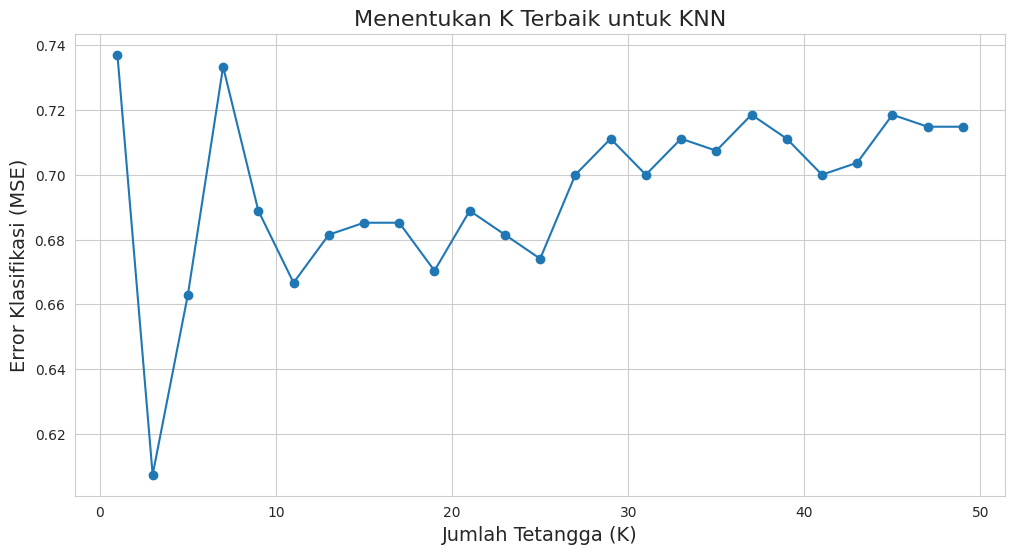

In [37]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline → hanya untuk Jupyter, tidak dibutuhkan jika pakai script Python biasa

# === Baca dan siapkan data ===
df = pd.read_csv('land_mines.csv')  # Gunakan file CSV hasil sebelumnya

# Opsional: Hapus kolom index otomatis jika ada
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

# Cek missing value, dan hanya ambil data yang lengkap
data_clean = df.dropna()
print("Dimensi data tanpa nilai yang hilang:", data_clean.shape)

# Pisahkan fitur dan target
X = data_clean.drop(columns=['M'])  # Semua kolom kecuali target
y = data_clean['M']

# Ubah label target ke angka (jika masih berupa string deskriptif)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# === Cross Validation KNN ===
k_list = list(range(1, 50, 2))
print(f"Nilai K yang akan diuji = {k_list}")
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Hitung MSE (Misclassification Error)
MSE = [1 - score for score in cv_scores]

# Plot hasil
plt.figure(figsize=(12, 6))
plt.plot(k_list, MSE, marker='o')
plt.title('Menentukan K Terbaik untuk KNN', fontsize=16)
plt.xlabel('Jumlah Tetangga (K)', fontsize=14)
plt.ylabel('Error Klasifikasi (MSE)', fontsize=14)
sns.set_style("whitegrid")
plt.grid(True)
plt.show()



In [41]:
# Prediksi data uji
y_pred = classifier.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'✅ Akurasi model KNN (k=5) adalah {round(accuracy, 2)} %.')


✅ Akurasi model KNN (k=5) adalah 42.65 %.
